# Méthode des moindres carrés

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.datasets import make_classification, make_regression, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

On commence par mesurer la distance entre les points et la droite de régression. Ces distances sont ici en pointillé rouge.

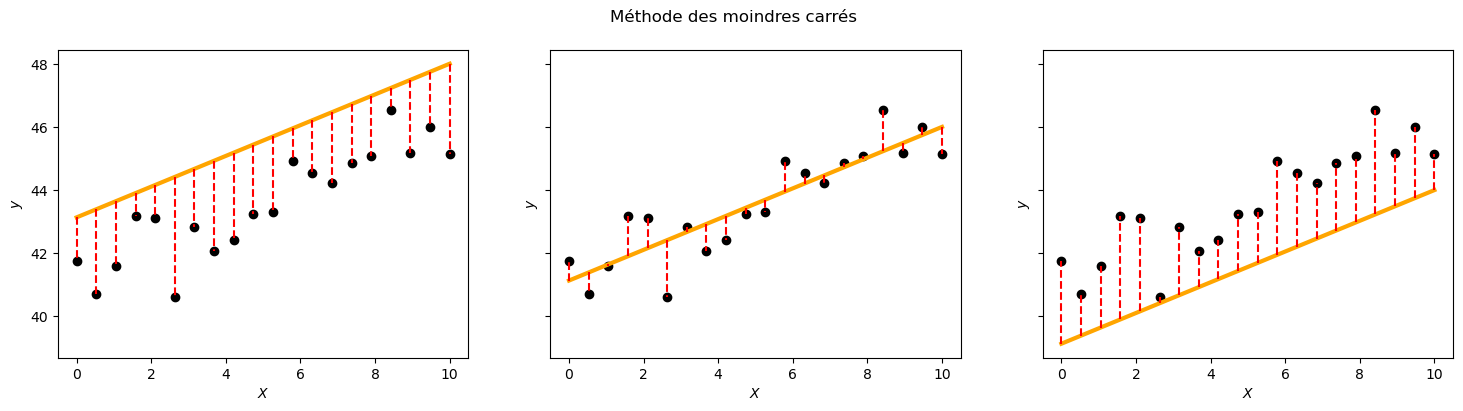

In [3]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
preds = model.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
fig.suptitle('Méthode des moindres carrés')
list_bias = [2, 0, -2]
for i, bias in enumerate(list_bias):
  ax[i].scatter(X, y, c='k')
  ax[i].plot(X, preds + bias, c='orange', lw=3)
  ax[i].vlines(x=X, ymin=preds + bias, ymax=y, color='r', ls='--')
  ax[i].set_xlabel('$X$')
  ax[i].set_ylabel('$y$')

plt.show()

Ici on voit l'évolution de l'erreur quadratique moyenne en faisant évoluer chacun des paramètre individuellemet.

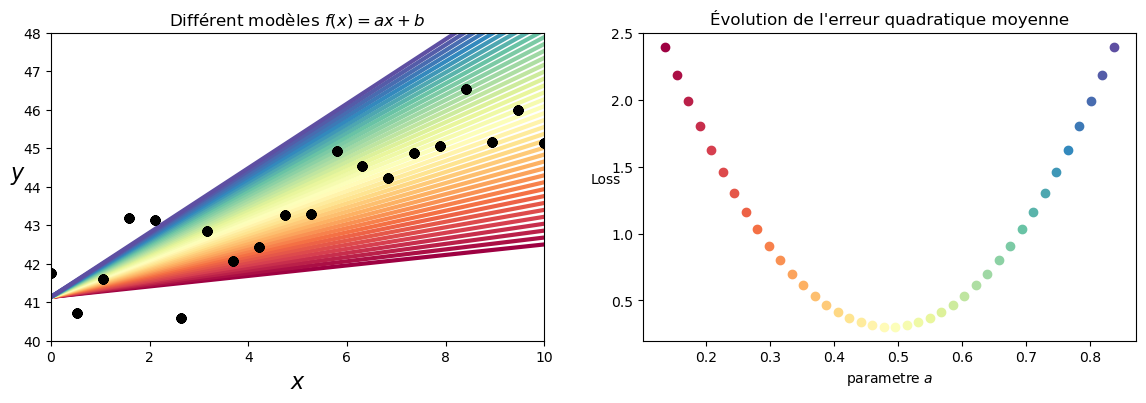

In [4]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_coefs = np.linspace(-0.35, 0.35, 40)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_coefs))))

for coef in list_coefs:
  pred = X * (model.coef_ + coef) + model.intercept_
  pred = pred.squeeze()
  c = next(color)
  ax[0].scatter(X, y, c='k', zorder=1)
  ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
  ax[0].set_xlabel('$x$', fontsize=16)
  ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
  ax[0].set_xlim(0, 10)
  ax[0].set_ylim(40, 48)

  L = 1/(2*m) * np.sum((pred - y)**2)
  ax[1].scatter(model.coef_ + coef, L, color=c)
  ax[1].set_xlabel('parametre $a$')
  ax[1].set_ylabel('Loss', rotation=0)

ax[0].set_title('Différent modèles $f(x) = a x + b$')
ax[1].set_title('Évolution de l\'erreur quadratique moyenne')

plt.show()

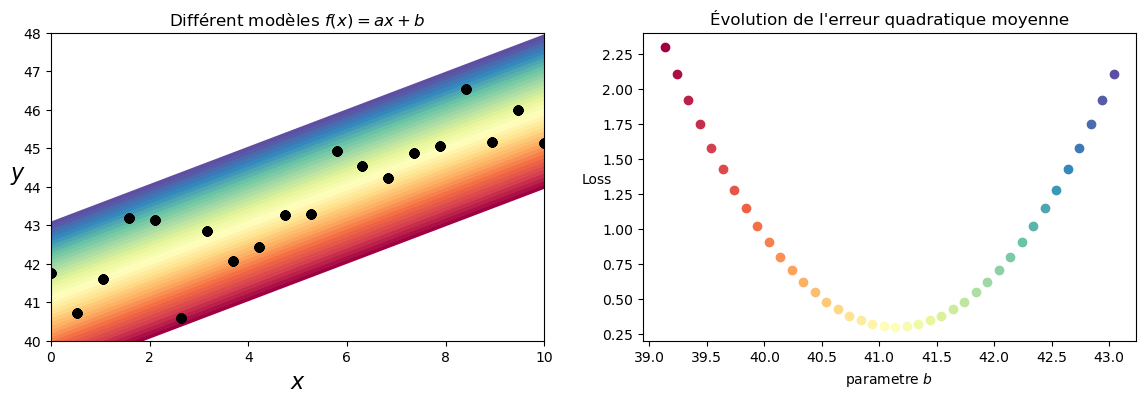

In [5]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_bias = np.arange(-2, 2, 0.1)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_bias))))

for bias in list_bias:
  pred = X * model.coef_+ model.intercept_ + bias
  pred = pred.squeeze()
  c = next(color)
  ax[0].scatter(X, y, c='k', zorder=1)
  ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
  ax[0].set_xlabel('$x$', fontsize=16)
  ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
  ax[0].set_xlim(0, 10)
  ax[0].set_ylim(40, 48)

  L = 1/(2*m) * np.sum((pred - y)**2)
  ax[1].scatter(model.intercept_ + bias, L, color=c)
  ax[1].set_xlabel('parametre $b$')
  ax[1].set_ylabel('Loss', rotation=0)

ax[0].set_title('Différent modèles $f(x) = a x + b$')
ax[1].set_title('Évolution de l\'erreur quadratique moyenne')

plt.show()

Si on combine les deux paramètres, on obtient une surface en 3D 

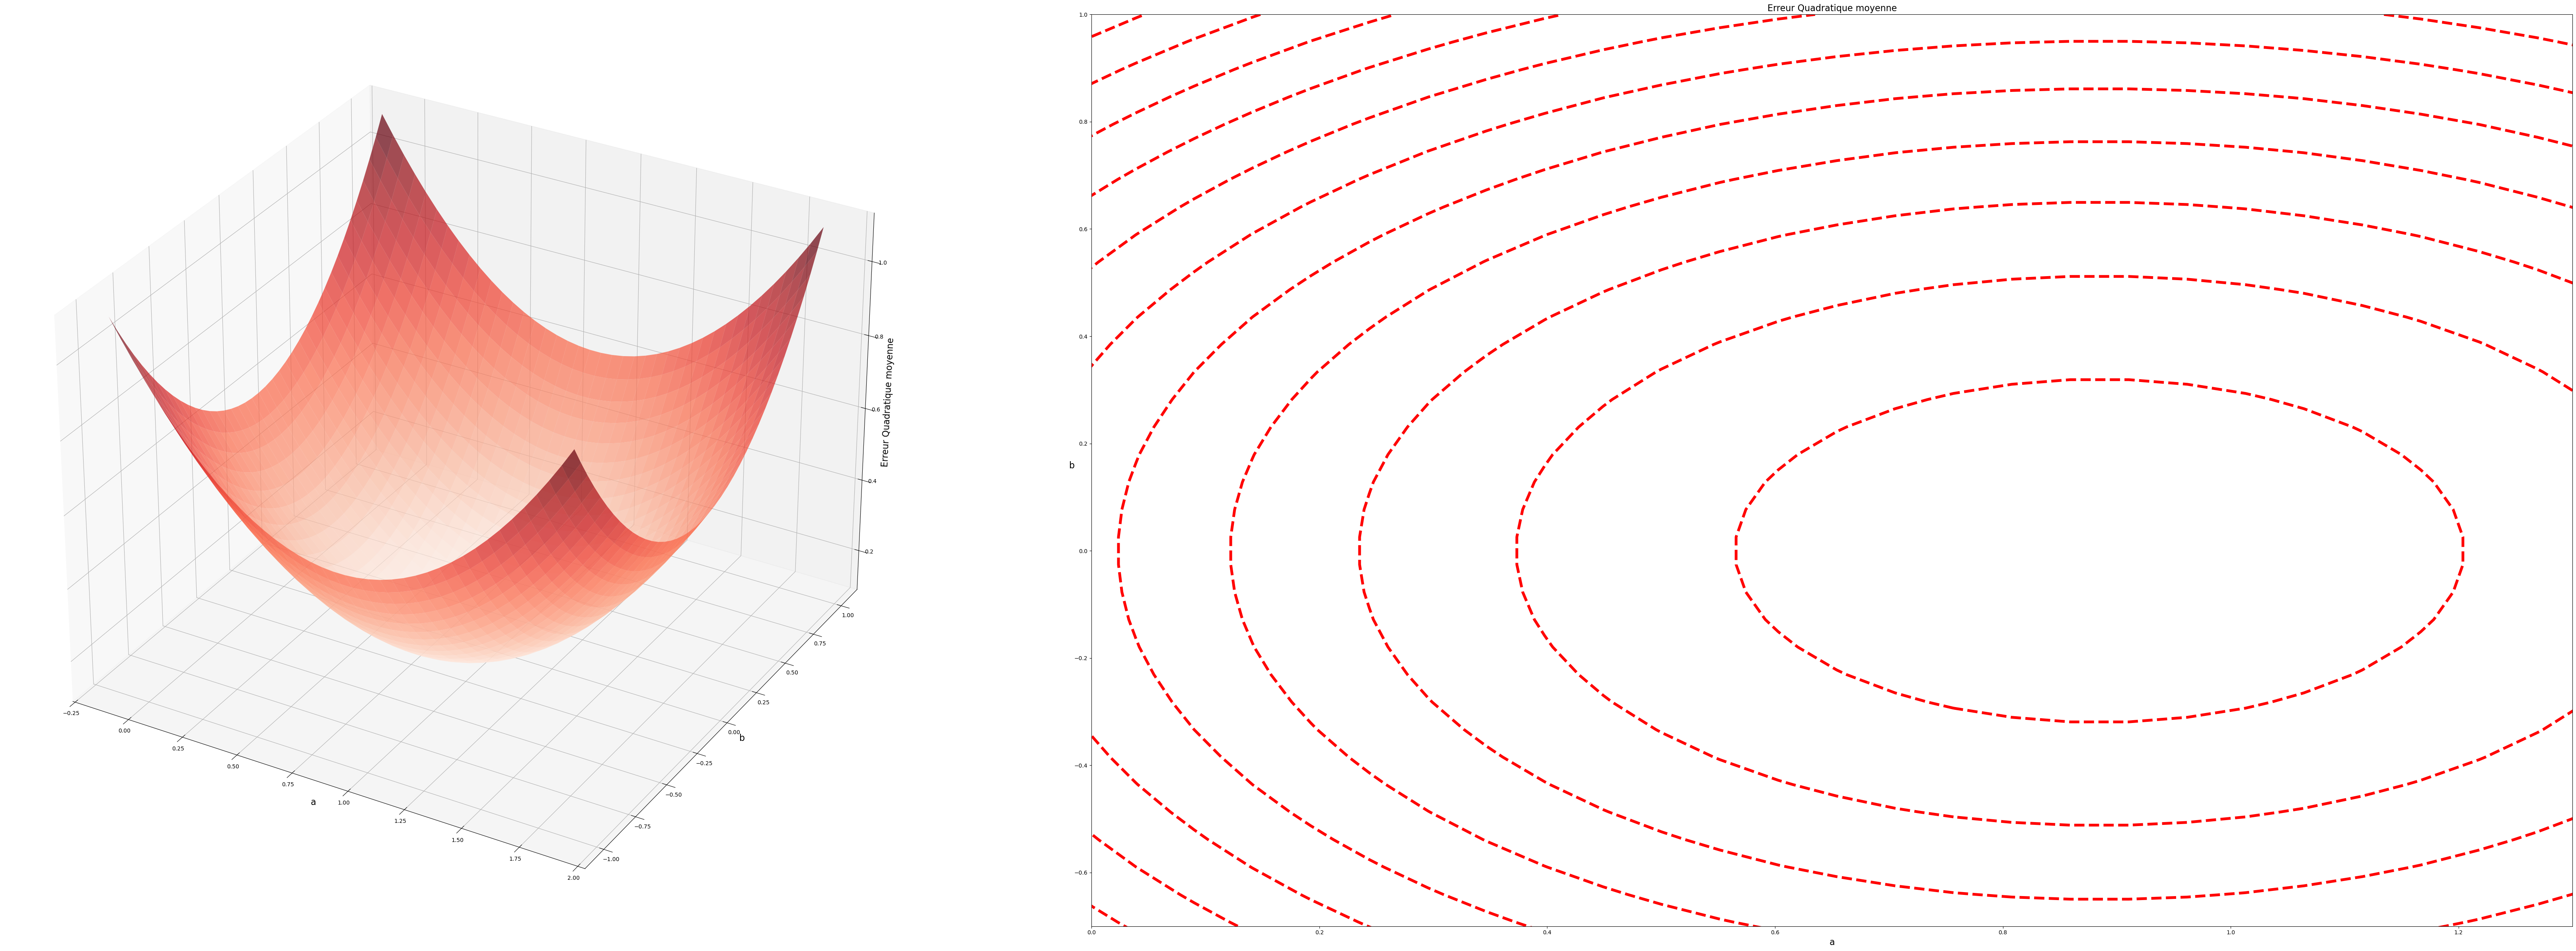

In [6]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

# Il faut normaliser les données sinon le graphique résultant est completement écrasé
X = (X - np.mean(X)) / X.std()
y = (y - np.mean(y)) / y.std()

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))

n = 40
list_coefs = np.linspace(-1, 1, n) + model.coef_
list_bias = np.linspace(-1, 1, n) + model.intercept_

list_coefs, list_bias = np.meshgrid(list_coefs, list_bias)


preds = list_coefs.flatten().reshape((-1, 1)) * X + list_bias.flatten().reshape((-1, 1))
L = 1/(2*m) * np.sum((preds - y)**2, axis=1)
L.shape

L = L.reshape((n, n))


fontsize = 16
fig = plt.figure(figsize=(18*4, 6*4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(list_coefs, list_bias, L, cmap='Reds', alpha=0.7)
ax.set_xlabel('a', fontsize=fontsize)
ax.set_ylabel('b', fontsize=fontsize)
ax.set_zlabel('Erreur Quadratique moyenne', fontsize=fontsize)

ax1 = fig.add_subplot(1, 2, 2)
ax1.contour(list_coefs, list_bias, L, colors='r', levels=15, linewidths=5, linestyles='dashed')
ax1.set_xlabel('a', fontsize=fontsize)
ax1.set_ylabel('b', fontsize=fontsize, rotation=0)
ax1.set_title('Erreur Quadratique moyenne', fontsize=fontsize)
ax1.set_xlim(0, 1.3)
ax1.set_ylim(-0.7, 1)
fig.tight_layout()

La minimisation se fait en cherchant le minimum de la fonction d'erreur quadratique moyenne. On peut faire ça en utilisant la méthode de la descente de gradient.
Elle est basée sur le calcul du gradient de la fonction d'erreur quadratique moyenne.

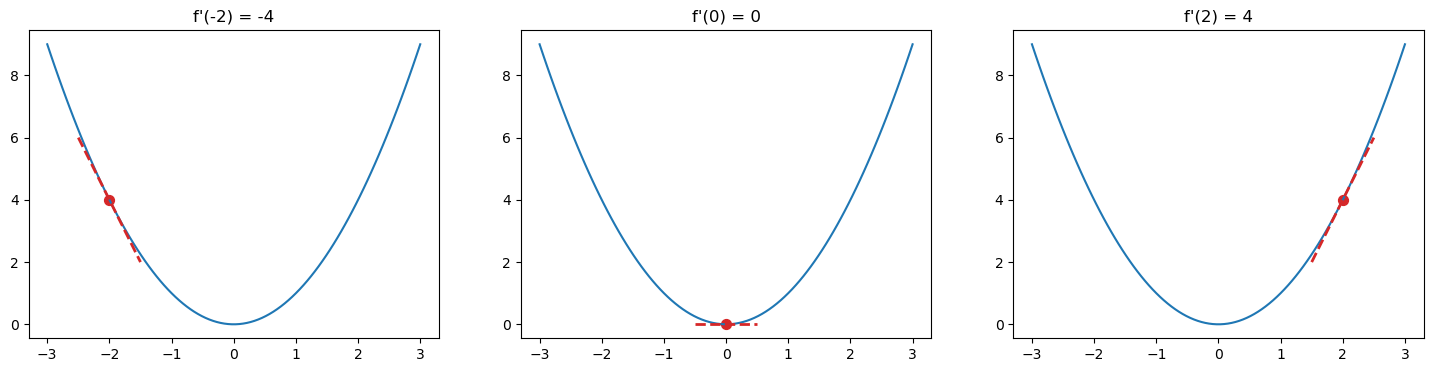

In [7]:
# Define parabola
def f(x):
    return x**2

# Define parabola derivative
def slope(x):
    return 2*x

# Define x data range for parabola
x = np.linspace(-3,3,100)

# Choose point to plot tangent line
# x1 = 3
# y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
# xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
xs = [-2, 0, 2]
for i in range(3):
  x1 = xs[i]
  y1 = f(x1)
  xrange = np.linspace(x1-0.5, x1+0.5, 10)
  ax[i].plot(x, f(x))
  ax[i].scatter(x1, y1, color='C3', s=50)
  ax[i].plot(xrange, line(xrange, x1, y1), 'C3--', linewidth = 2)
  ax[i].set_title(f'f\'({x1}) = {2*x1}')

Avec ces gradients, on sait dans quelle direction aller pour minimiser la fonction d'erreur quadratique moyenne. On peut donc faire une descente de gradient en suivant le gradient.

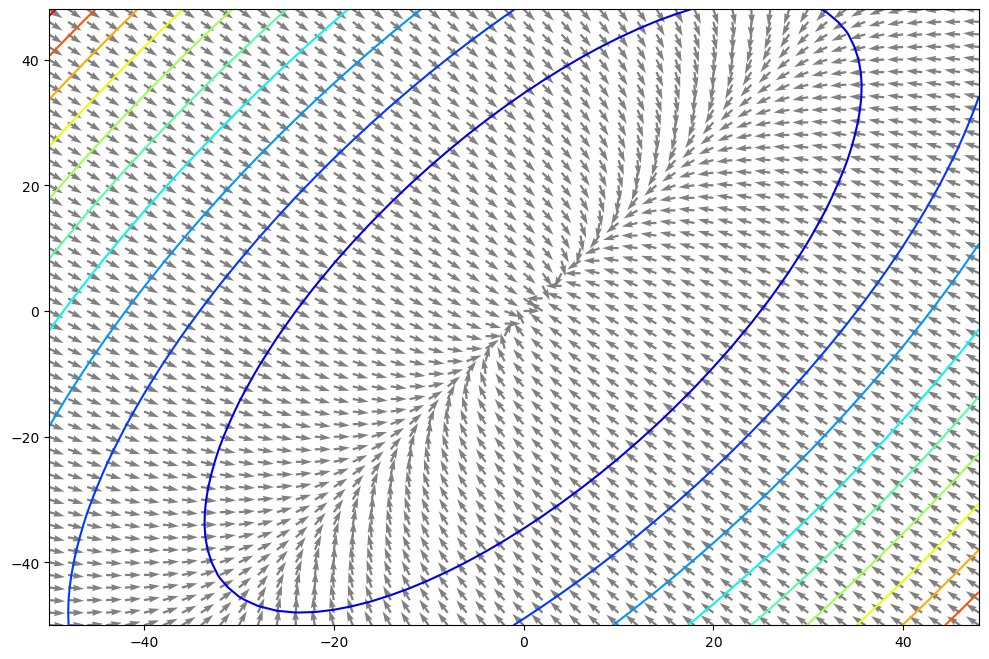

In [10]:
feature_x = np.arange(-50, 50, 2)
feature_y = np.arange(-50, 50, 2)

x, y = np.meshgrid(feature_x, feature_y)
z = 0.5*(y-x)**2 + 0.5*(1-x)**2
u = 2*x - y - 1
v = y - x

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# ax.set_aspect(1)
# ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, -u, -v, units='xy', scale=0.5, color='gray')
ax.contour(x, y, z, 10, cmap='jet')

Plus la pente est forte, plus on avance vite. Plus la pente est faible, plus on avance lentement. 